In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import tarfile
import urllib
ROOT_DIR = "."

happiness_path = os.path.join(ROOT_DIR, "happiness-score/2019.csv")
df = pd.read_csv(happiness_path)

In [2]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [131]:
# https://psychology.wikia.org/wiki/Collectivist_and_individualist_cultures#:~:text=1%20United%20States%202%20Australia%203%20United%20Kingdom,Italy%209%20France%2010%20Belgium%20More%20items...%20
individual_str = '''United States
Australia
United Kingdom
Canada
Netherlands
Hungary
New Zealand
Italy
France
Belgium
Ireland
Switzerland
Finland
Denmark
Norway
Iceland
Sweden
Germany
South Africa
Luxembourg
Czech Republic
Austria
Israel
Slovakia
Poland
Lithuania
Latvia
Estonia'''
individual_li = individual_str.split('\n')

In [132]:
collective_str='''Afghanistan
Azerbaijan
Argentina
Armenia
Belarus
Brazil
Bangladesh
Ethiopia
Bulgaria
Cyprus
Cuba
Egypt
Guatemala
Ghana
Dominican Republic
El Salvador
Georgia
Greece
Hong Kong
Indonesia
India
Japan
Kazakhstan
Kyrgyzstan
Korea
Kenya 
Lebanon
Morocco
Malaysia
Mexico
Myanmar
Madagascar
Nepal
Nigeria
Portugal
Pakistan
Philippines
Poland
Polynesia
Romania
Russia
Ukraine
Saudi Arabia
Serbia
South Korea
Singapore
Spain
Sri Lanka
Turkey
Vietnam
Uganda
Somalia
Taiwan
Thailand
Zambia'''
collective_li = collective_str.split('\n')

In [133]:
print(len(individual_li)+ len(collective_li))

83


In [28]:
df1 = df[['Overall rank', 'Country or region','Score']]
df1 = df1.to_numpy()
df1

array([[1, 'Finland', 7.769],
       [2, 'Denmark', 7.6],
       [3, 'Norway', 7.553999999999999],
       [4, 'Iceland', 7.494],
       [5, 'Netherlands', 7.4879999999999995],
       [6, 'Switzerland', 7.48],
       [7, 'Sweden', 7.343],
       [8, 'New Zealand', 7.307],
       [9, 'Canada', 7.278],
       [10, 'Austria', 7.246],
       [11, 'Australia', 7.228],
       [12, 'Costa Rica', 7.167000000000001],
       [13, 'Israel', 7.138999999999999],
       [14, 'Luxembourg', 7.09],
       [15, 'United Kingdom', 7.053999999999999],
       [16, 'Ireland', 7.021],
       [17, 'Germany', 6.985],
       [18, 'Belgium', 6.922999999999999],
       [19, 'United States', 6.892],
       [20, 'Czech Republic', 6.852],
       [21, 'United Arab Emirates', 6.825],
       [22, 'Malta', 6.726],
       [23, 'Mexico', 6.595],
       [24, 'France', 6.5920000000000005],
       [25, 'Taiwan', 6.446000000000001],
       [26, 'Chile', 6.444],
       [27, 'Guatemala', 6.436],
       [28, 'Saudi Arabia', 6.375]

In [29]:
'''
df_individual = np.empty()
df_collective = np.empty()
for r in range(len(df1)):
#     print(df1[r][1])
    if df1[r][1] in individual_li: np.append(df_individual, df1[r], axis=0)
    elif df1[r][1] in collective_li: df_collective.append(df1[r])
#     else: print(df1[r])
print(df_collective)
'''

'\ndf_individual = np.empty()\ndf_collective = np.empty()\nfor r in range(len(df1)):\n#     print(df1[r][1])\n    if df1[r][1] in individual_li: np.append(df_individual, df1[r], axis=0)\n    elif df1[r][1] in collective_li: df_collective.append(df1[r])\n#     else: print(df1[r])\nprint(df_collective)\n'

In [30]:
df_individual = []
df_collective = []
for r in range(len(df1)):
#     print(df1[r][1])
    li = df1[r].tolist()
    del li[1]
    if df1[r][1] in individual_li: df_individual.append(li)
    elif df1[r][1] in collective_li: df_collective.append(li)
#     else: print(df1[r])
print(df_individual)

[[1, 7.769], [2, 7.6], [3, 7.553999999999999], [4, 7.494], [5, 7.4879999999999995], [6, 7.48], [7, 7.343], [8, 7.307], [9, 7.278], [10, 7.246], [11, 7.228], [13, 7.138999999999999], [14, 7.09], [15, 7.053999999999999], [16, 7.021], [17, 6.985], [18, 6.922999999999999], [19, 6.892], [20, 6.852], [24, 6.5920000000000005], [30, 6.354], [36, 6.223], [38, 6.1979999999999995], [40, 6.182], [42, 6.149], [53, 5.94], [55, 5.893], [62, 5.757999999999999], [106, 4.7219999999999995]]


In [31]:
# df_individual = pd.DataFrame(df_individual)
# df_collective = pd.DataFrame(df_collective)
# df_collective.info()

df_individual = np.array(df_individual)
df_collective = np.array(df_collective)
df_collective

array([[ 23.   ,   6.595],
       [ 25.   ,   6.446],
       [ 27.   ,   6.436],
       [ 28.   ,   6.375],
       [ 32.   ,   6.3  ],
       [ 34.   ,   6.262],
       [ 35.   ,   6.253],
       [ 47.   ,   6.086],
       [ 48.   ,   6.07 ],
       [ 49.   ,   6.046],
       [ 52.   ,   6.008],
       [ 54.   ,   5.895],
       [ 58.   ,   5.886],
       [ 60.   ,   5.809],
       [ 66.   ,   5.693],
       [ 67.   ,   5.653],
       [ 68.   ,   5.648],
       [ 69.   ,   5.631],
       [ 70.   ,   5.603],
       [ 76.   ,   5.43 ],
       [ 77.   ,   5.425],
       [ 79.   ,   5.373],
       [ 80.   ,   5.339],
       [ 81.   ,   5.323],
       [ 82.   ,   5.287],
       [ 85.   ,   5.265],
       [ 89.   ,   5.208],
       [ 90.   ,   5.208],
       [ 91.   ,   5.197],
       [ 92.   ,   5.192],
       [ 94.   ,   5.175],
       [ 97.   ,   5.011],
       [ 98.   ,   4.996],
       [100.   ,   4.913],
       [112.   ,   4.668],
       [116.   ,   4.559],
       [119.   ,   4.519],
 

In [32]:
len(df_collective)

47

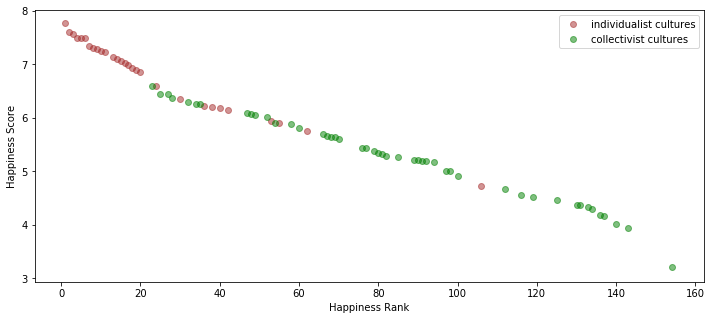

In [33]:
# df_individual.plot(kind="scatter", x=" 0", y=" 2", figsize= (20,5),color="red") 
plt.figure(figsize=(12, 5))
plt.scatter(df_individual[:,0], df_individual[:,1], c="brown", alpha=0.5, label="individualist cultures")
plt.scatter(df_collective[:,0], df_collective[:,1], c="green", alpha=0.5, label="collectivist cultures")
plt.ylabel('Happiness Score')
plt.xlabel('Happiness Rank')
plt.legend()

In [35]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [123]:
df2 = df[['Country or region','Score','Generosity','Perceptions of corruption']]
df2 = df2.to_numpy()

In [124]:
df_individual2 = []
df_collective2 = []
for r in range(len(df2)):
#     print(df1[r][1])
    li = df2[r].tolist()
    del li[0]
    if df2[r][0] in individual_li: df_individual2.append(li)
    elif df2[r][0] in collective_li: df_collective2.append(li)
#     else: print(df1[r])
print(df_individual2)

[[7.769, 0.153, 0.39299999999999996], [7.6, 0.252, 0.41], [7.553999999999999, 0.271, 0.341], [7.494, 0.354, 0.11800000000000001], [7.4879999999999995, 0.322, 0.298], [7.48, 0.263, 0.34299999999999997], [7.343, 0.267, 0.373], [7.307, 0.33, 0.38], [7.278, 0.285, 0.308], [7.246, 0.244, 0.226], [7.228, 0.332, 0.29], [7.138999999999999, 0.261, 0.08199999999999999], [7.09, 0.19399999999999998, 0.316], [7.053999999999999, 0.348, 0.278], [7.021, 0.298, 0.31], [6.985, 0.261, 0.265], [6.922999999999999, 0.16, 0.21], [6.892, 0.28, 0.128], [6.852, 0.046, 0.036000000000000004], [6.5920000000000005, 0.111, 0.183], [6.223, 0.158, 0.03], [6.1979999999999995, 0.121, 0.013999999999999999], [6.182, 0.11699999999999999, 0.05], [6.149, 0.043, 0.042], [5.94, 0.075, 0.064], [5.893, 0.10300000000000001, 0.161], [5.757999999999999, 0.081, 0.02], [4.7219999999999995, 0.13, 0.055]]


In [125]:
df_individual2 = np.array(df_individual2)
df_collective2 = np.array(df_collective2)

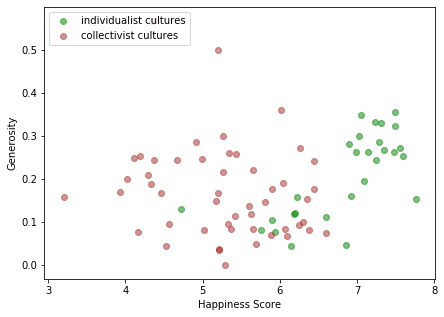

In [129]:
plt.figure(figsize=(7, 5))
plt.scatter(df_individual2[:,0], df_individual2[:,1], c="green", alpha=0.5, label="individualist cultures")
plt.scatter(df_collective2[:,0], df_collective2[:,1], c="brown", alpha=0.5, label="collectivist cultures")
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.legend(loc='upper left')

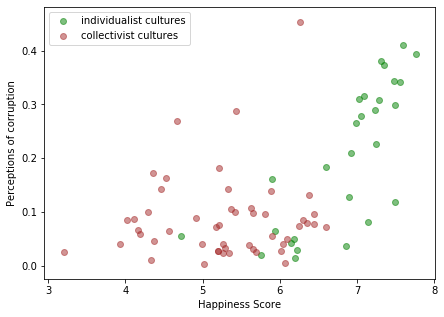

In [130]:
plt.figure(figsize=(7, 5))
plt.scatter(df_individual2[:,0], df_individual2[:,2], c="green", alpha=0.5, label="individualist cultures")
plt.scatter(df_collective2[:,0], df_collective2[:,2], c="brown", alpha=0.5, label="collectivist cultures")
plt.xlabel('Happiness Score')
plt.ylabel('Perceptions of corruption')
plt.legend(loc='upper left')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Happiness Score')]

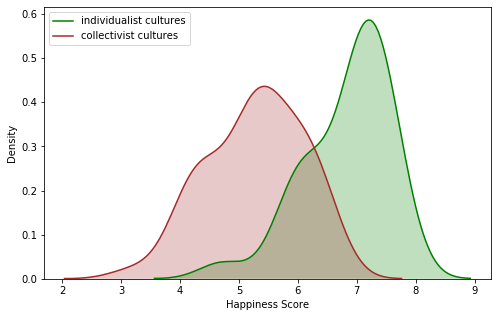

In [113]:
# library and dataset
import seaborn as sns
from matplotlib import pyplot
 
# plot of 2 variables
a4_dims = (8, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
p1=sns.kdeplot(df_individual2[:,0], shade=True, color="green", label="individualist cultures")
p1=sns.kdeplot(df_collective2[:,0], shade=True, color="brown", label="collectivist cultures")
p1.set(xlabel='Happiness Score', ylabel='Density')
# sns.plt.show()


In [11]:
# 2 density graph, on top of each other
# gradient

In [12]:
# http://clearlycultural.com/geert-hofstede-cultural-dimensions/individualism/#:~:text=Individualism%20%20%20Country%20%20%20PDI%20,%20%2053%20%2062%20more%20rows%20
# https://worldpopulationreview.com/country-rankings/collectivist-countries
index_str = '''United States	40	91	62	46	29
Australia	36	90	61	51	31
United Kingdom	35	89	66	35	25
Netherlands	38	80	14	53	44
New Zealand	22	79	58	49	30
Italy	50	76	70	75	
Belgium	65	75	54	94	
Denmark	18	74	16	23	
France	68	71	43	86	
Sweden	31	71	5	29	33
Ireland	28	70	68	35	
Norway	31	69	8	50	20
Switzerland	34	68	70	58	
Germany	35	67	66	65	31
South Africa	49	65	63	49	
Finland	33	63	26	59	
Poland	68	60	64	93	
Czech Republic	57	58	57	74	
Austria	11	55	79	70	
Hungary	46	55	88	82	
Israel	13	54	47	81	
Spain	57	51	42	86	
India	77	48	56	40	61
Argentina	49	46	56	86	
Japan	54	46	95	92	80
Iran	58	41	43	59	
Jamaica	45	39	68	13	
Brazil	69	38	49	76	65
Egypt	80	38	52	68	
Iraq	80	38	52	68	
Kuwait	80	38	52	68	
Lebanon	80	38	52	68	
Libya	80	38	52	68	
Saudi Arabia	80	38	52	68	
United Arab Emirates	80	38	52	68	
Turkey	66	37	45	85	
Uruguay	61	36	38	100	
Greece	60	35	57	112	
Philippines	94	32	64	44	19
Mexico	81	30	69	82	
Ethiopia	64	27	41	52	25
Kenya	64	27	41	52	25
Portugal	63	27	31	104	
Tanzania	64	27	41	52	25
Zambia	64	27	41	52	25
Malaysia	104	26	50	36	
Hong Kong	68	25	57	29	96
Chile	63	23	28	86	
China	80	20	66	40	118
Ghana	77	20	46	54	16
Nigeria	77	20	46	54	16
Sierra Leone	77	20	46	54	16
Singapore	74	20	48	8	48
Thailand	64	20	34	64	56
El Salvador	66	19	40	94	
South Korea	60	18	39	85	75
Taiwan	58	17	45	69	87
Peru	64	16	42	87	
Costa Rica	35	15	21	86	
Indonesia	78	14	46	48	
Pakistan	55	14	50	70	
Colombia	67	13	64	80	
Venezuela	81	12	73	76	
Panama	95	11	44	86	
Ecuador	78	8	63	67	
Guatemala	95	6	37	101'''
str_li1 = index_str.split('\n')
index_li = []
for s in str_li1:
    row = s.split('\t')
    index_li.append([row[0], int(row[2])])
print(index_li[:10])
# first column is the country name, second column is the individuality index

[['United States', 91], ['Australia', 90], ['United Kingdom', 89], ['Netherlands', 80], ['New Zealand', 79], ['Italy', 76], ['Belgium', 75], ['Denmark', 74], ['France', 71], ['Sweden', 71]]


In [13]:
for i in range(len(df1)):
    li = df1[i].tolist()
    name, score = li[1], li[2]
    for j in range(len(index_li)):
        # check the name in the countries list matches the name in countries name
        if name == index_li[j][0]: index_li[j].append(score)

index_li

[['United States', 91, 6.892],
 ['Australia', 90, 7.228],
 ['United Kingdom', 89, 7.053999999999999],
 ['Netherlands', 80, 7.4879999999999995],
 ['New Zealand', 79, 7.307],
 ['Italy', 76, 6.223],
 ['Belgium', 75, 6.922999999999999],
 ['Denmark', 74, 7.6],
 ['France', 71, 6.5920000000000005],
 ['Sweden', 71, 7.343],
 ['Ireland', 70, 7.021],
 ['Norway', 69, 7.553999999999999],
 ['Switzerland', 68, 7.48],
 ['Germany', 67, 6.985],
 ['South Africa', 65, 4.7219999999999995],
 ['Finland', 63, 7.769],
 ['Poland', 60, 6.182],
 ['Czech Republic', 58, 6.852],
 ['Austria', 55, 7.246],
 ['Hungary', 55, 5.757999999999999],
 ['Israel', 54, 7.138999999999999],
 ['Spain', 51, 6.354],
 ['India', 48, 4.015],
 ['Argentina', 46, 6.086],
 ['Japan', 46, 5.886],
 ['Iran', 41, 4.548],
 ['Jamaica', 39, 5.89],
 ['Brazil', 38, 6.3],
 ['Egypt', 38, 4.166],
 ['Iraq', 38, 4.437],
 ['Kuwait', 38, 6.021],
 ['Lebanon', 38, 5.197],
 ['Libya', 38, 5.525],
 ['Saudi Arabia', 38, 6.375],
 ['United Arab Emirates', 38, 6.825]

In [19]:
len(index_li)

66

In [14]:
for i in range(len(index_li)):
    del index_li[i][0]
    
index_li = np.array(index_li)
index_li

array([[91.   ,  6.892],
       [90.   ,  7.228],
       [89.   ,  7.054],
       [80.   ,  7.488],
       [79.   ,  7.307],
       [76.   ,  6.223],
       [75.   ,  6.923],
       [74.   ,  7.6  ],
       [71.   ,  6.592],
       [71.   ,  7.343],
       [70.   ,  7.021],
       [69.   ,  7.554],
       [68.   ,  7.48 ],
       [67.   ,  6.985],
       [65.   ,  4.722],
       [63.   ,  7.769],
       [60.   ,  6.182],
       [58.   ,  6.852],
       [55.   ,  7.246],
       [55.   ,  5.758],
       [54.   ,  7.139],
       [51.   ,  6.354],
       [48.   ,  4.015],
       [46.   ,  6.086],
       [46.   ,  5.886],
       [41.   ,  4.548],
       [39.   ,  5.89 ],
       [38.   ,  6.3  ],
       [38.   ,  4.166],
       [38.   ,  4.437],
       [38.   ,  6.021],
       [38.   ,  5.197],
       [38.   ,  5.525],
       [38.   ,  6.375],
       [38.   ,  6.825],
       [37.   ,  5.373],
       [36.   ,  6.293],
       [35.   ,  5.287],
       [32.   ,  5.631],
       [30.   ,  6.595],


In [15]:
x_axis, y_axis = index_li[:,0], index_li[:,1]

In [16]:
slope, offset  = np.polyfit(x_axis, y_axis, 1)
y_axis2 = slope * x_axis + offset
print(slope, offset)

0.023444203621572842 5.023016647881613


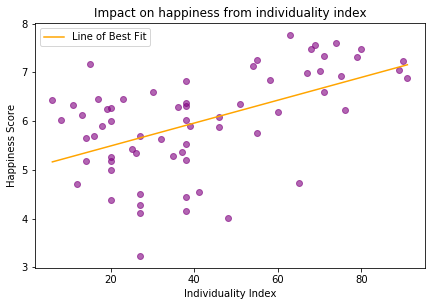

In [17]:
plt.figure(figsize=(7, 4.5))
plt.scatter(x_axis, y_axis, c="purple", alpha=0.6)
plt.plot(x_axis, y_axis2, color = 'orange', label = 'Line of Best Fit')
plt.ylabel('Happiness Score')
plt.xlabel('Individuality Index')
plt.title("Impact on happiness from individuality index")
plt.legend()

In [18]:
# 